In [1]:
library(readr)
library(readxl)
library(olsrr)
library(MASS)
library(normtest)
library(nortest)
library(psych)
library(fitdistrplus)


Attaching package: 'olsrr'


The following object is masked from 'package:datasets':

    rivers



Attaching package: 'MASS'


The following object is masked from 'package:olsrr':

    cement


Warning message:
"package 'psych' was built under R version 4.1.2"
Warning message:
"package 'fitdistrplus' was built under R version 4.1.2"
Loading required package: survival



### Cargado de la base de datos

In [2]:
casen <- read_excel('CASEN_DB.xlsx')

In [3]:
head(casen)

X1,X2,X3,X4,X5,X6,V1,V2,Z1,E1,E2,R,O
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
119410,260000,854170,83340,778376,100000,1,0,1,1,0,1,1
79610,100000,975000,125000,585961,110000,0,1,1,1,0,0,0
39800,700000,662500,250000,2838385,120000,1,0,1,1,0,0,1
39800,700000,662500,250000,2838385,120000,1,0,1,1,0,0,1
119410,320000,500000,83330,789907,100000,1,0,1,1,0,0,1
79610,700000,733330,83330,1131115,120000,1,0,1,1,0,0,1


### Analisis exploratorio de las variables del modelo

In [4]:
library(lattice)
library(survival)
library(Formula)
library(ggplot2)
library("Hmisc")


Attaching package: 'ggplot2'


The following objects are masked from 'package:psych':

    %+%, alpha


Warning message:
"package 'Hmisc' was built under R version 4.1.2"

Attaching package: 'Hmisc'


The following object is masked from 'package:psych':

    describe


The following objects are masked from 'package:base':

    format.pval, units




In [5]:
cor(casen) #Matriz de correlación

,X1,X2,X3,X4,X5,X6,V1,V2,Z1,E1,E2,R,O
X1,1.00000000,-0.062869435,0.42459215,0.412631910,0.13138674,0.278130329,-0.08010020,0.06687793,-0.07972155,0.00624102,-0.077924308,0.09031390,0.032239130
X2,-0.06286944,1.000000000,-0.07836024,0.032179844,0.58971856,-0.002065386,0.05620153,-0.03551505,-0.08716564,-0.08689130,0.178592000,-0.11152996,0.059856846
X3,0.42459215,-0.078360244,1.00000000,0.269735655,0.17102606,0.173324829,-0.12801639,-0.01357153,-0.04480766,-0.02508577,-0.117885114,-0.02364027,-0.038944697
X4,0.41263191,0.032179844,0.26973566,1.000000000,0.23670322,0.119927485,-0.05484338,-0.01686337,-0.10871117,-0.10933648,0.003723566,-0.03200759,0.009512226
X5,0.13138674,0.589718562,0.17102606,0.236703217,1.00000000,0.175212042,-0.22295358,0.24682193,-0.15419502,-0.07448631,0.068446164,-0.02435903,0.045259829
X6,0.27813033,-0.002065386,0.17332483,0.119927485,0.17521204,1.000000000,0.03652295,-0.02532014,-0.01212653,0.06997058,0.027266183,0.11511137,-0.101805954
V1,-0.08010020,0.056201526,-0.12801639,-0.054843379,-0.22295358,0.036522952,1.00000000,-0.67817078,0.30714756,-0.02686077,0.121836337,0.02461830,0.000000000
V2,0.06687793,-0.035515047,-0.01357153,-0.016863373,0.24682193,-0.025320140,-0.67817078,1.00000000,-0.19810652,-0.03609813,-0.109681872,-0.02205632,-0.049080332
Z1,-0.07972155,-0.087165640,-0.04480766,-0.108711168,-0.15419502,-0.012126528,0.30714756,-0.19810652,1.00000000,0.18645494,-0.126850081,0.11392585,-0.062816865
E1,0.00624102,-0.086891298,-0.02508577,-0.109336484,-0.07448631,0.069970582,-0.02686077,-0.03609813,0.18645494,1.00000000,-0.573211504,-0.01835014,0.039328325


Warning message:
"package 'corrplot' was built under R version 4.1.2"
corrplot 0.92 loaded



png 
  2

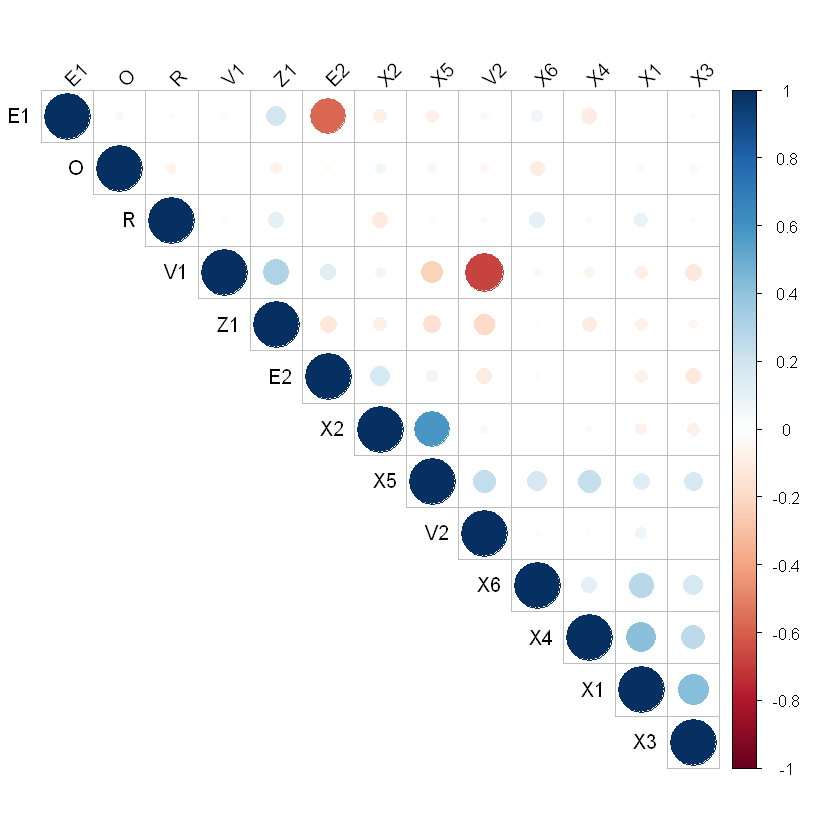

In [6]:
library(corrplot)
pdf("Plot_Corr.pdf")
    mat_cor=cor(casen)
    corrplot(mat_cor, type="upper", order="hclust", tl.col="black", tl.srt=45)
dev.off()
mat_cor=cor(casen)
corrplot(mat_cor, type="upper", order="hclust", tl.col="black", tl.srt=45)

# Histogramas y diagramas de caja de cada Variable

## X1 : Aporte familiar permanente.

In [7]:
pdf("Histo_AporteFamiliarPermanente.pdf")
hist_X1 <- hist(casen$X1, main="Aporte familiar permanente",
        xlab="Aporte familiar recibido [$]",
        prob = TRUE)
dev.off()

png 
  2

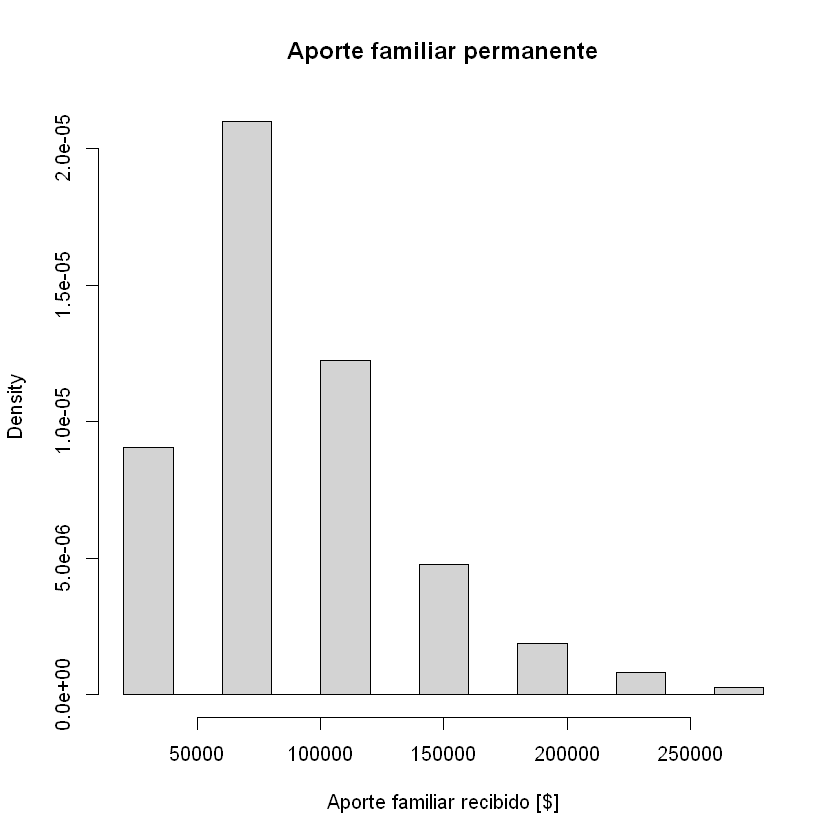

In [8]:
hist_X1 <- hist(casen$X1, main="Aporte familiar permanente",
        xlab="Aporte familiar recibido [$]",
        prob = TRUE)

png 
  2

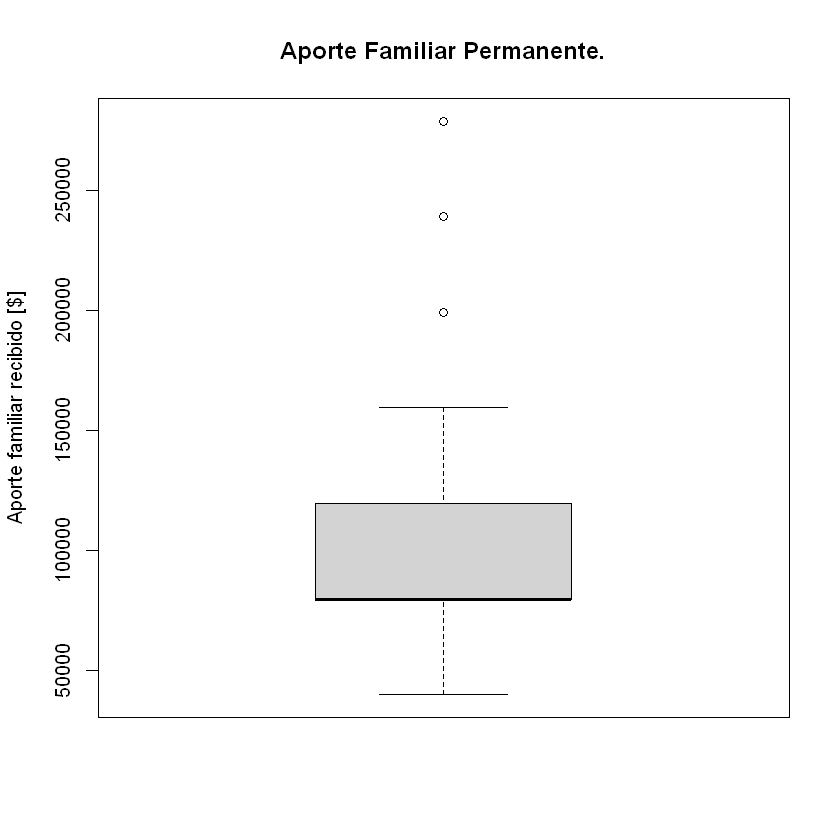

In [9]:
pdf("Box_AporteFamiliarPermanente.pdf")
box_charge <- boxplot(casen$X1, main="Aporte Familiar Permanente.",
                      ylab= "Aporte familiar recibido [$]")
dev.off()
box_charge <- boxplot(casen$X1, main="Aporte Familiar Permanente.",
                      ylab= "Aporte familiar recibido [$]")

## X2 : Sueldo del mes anterior.

In [10]:
pdf("Histo_SueldoAnterior.pdf")
hist_X1 <- hist(casen$X2, main="Sueldo del mes anterior",
        xlab="Sueldo del mes anterior [$]",
        prob = TRUE)
dev.off()

png 
  2

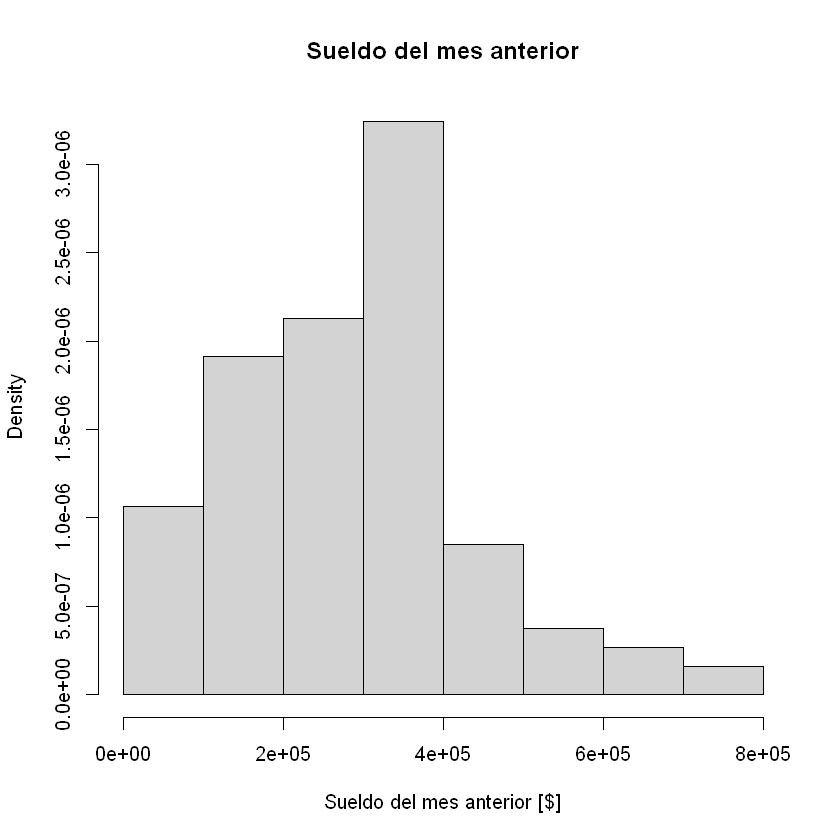

In [11]:
hist_X1 <- hist(casen$X2, main="Sueldo del mes anterior",
        xlab="Sueldo del mes anterior [$]",
        prob = TRUE)

png 
  2

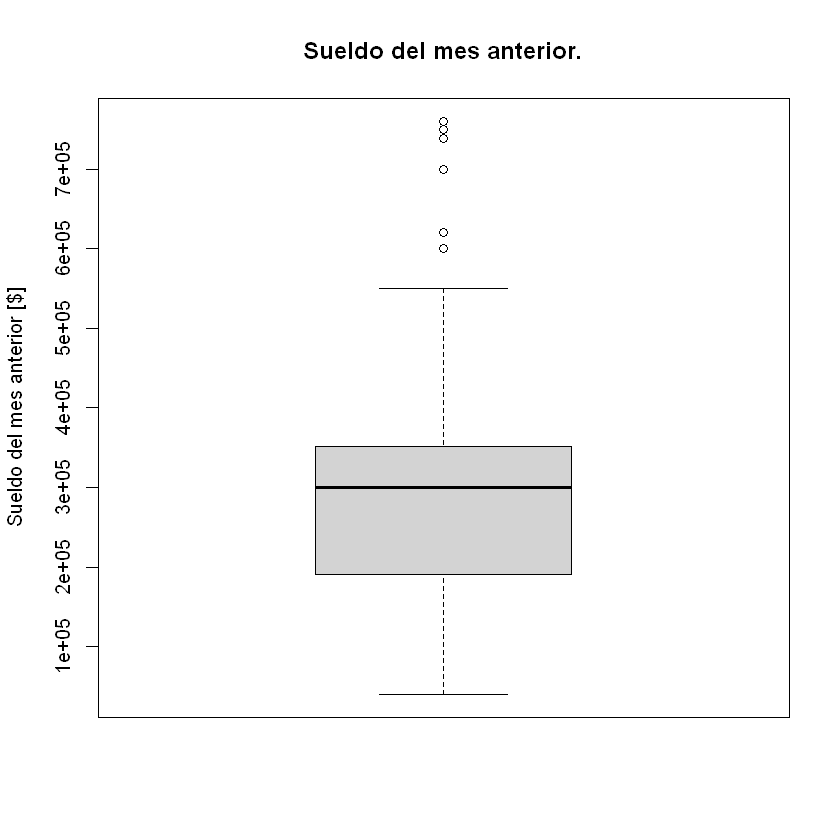

In [12]:
pdf("Box_SueldoAnterior.pdf")
box_charge <- boxplot(casen$X2, main="Sueldo del mes anterior.",
                      ylab= "Sueldo del mes anterior [$]")
dev.off()
box_charge <- boxplot(casen$X2, main="Sueldo del mes anterior.",
                      ylab= "Sueldo del mes anterior [$]")

## X3 : Ingreso Familiar de Emergencia.

png 
  2

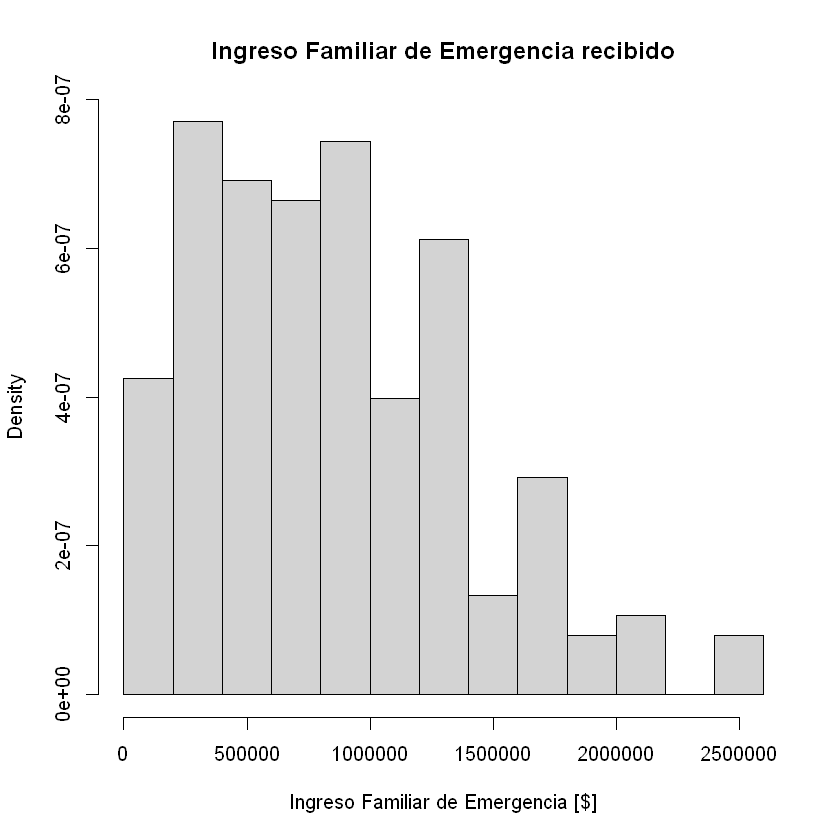

In [13]:
pdf("Histo_IFE.pdf")
hist_X1 <- hist(casen$X3, main="Ingreso Familiar de Emergencia recibido",
        xlab="Ingreso Familiar de Emergencia [$]",
        prob = TRUE)
dev.off()
hist_X1 <- hist(casen$X3, main="Ingreso Familiar de Emergencia recibido",
        xlab="Ingreso Familiar de Emergencia [$]",
        prob = TRUE)

png 
  2

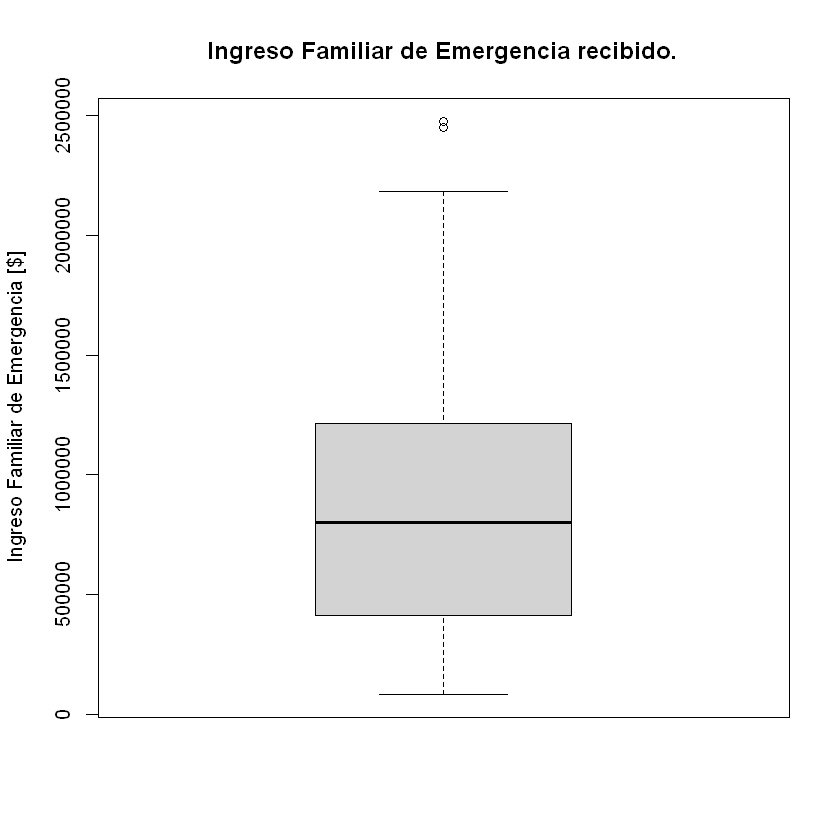

In [14]:
pdf("Box_IFE.pdf")
box_charge <- boxplot(casen$X3, main="Ingreso Familiar de Emergencia recibido.",
                      ylab= "Ingreso Familiar de Emergencia [$]")
dev.off()
box_charge <- boxplot(casen$X3, main="Ingreso Familiar de Emergencia recibido.",
                      ylab= "Ingreso Familiar de Emergencia [$]")

## X4 : Bono de Emergencia Covid19

png 
  2

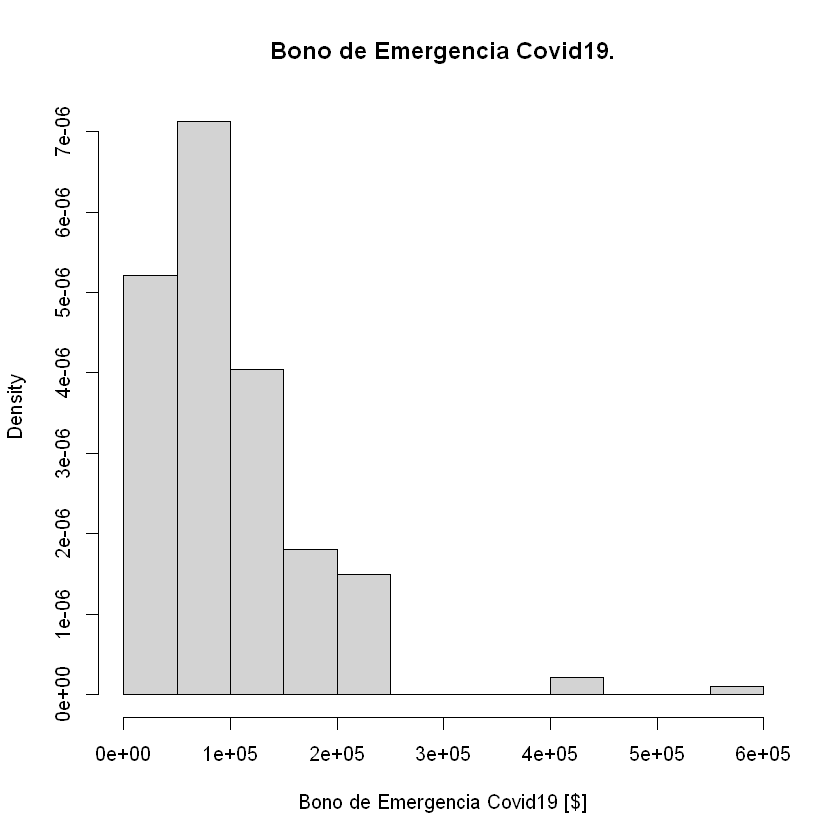

In [15]:
pdf("Histo_BonoCovid.pdf")
hist_X1 <- hist(casen$X4, main="Bono de Emergencia Covid19 recibido.",
        xlab="Bono de Emergencia Covid19 [$]",
        prob = TRUE)
dev.off()
hist_X1 <- hist(casen$X4, main="Bono de Emergencia Covid19.",
        xlab="Bono de Emergencia Covid19 [$]",
        prob = TRUE)

png 
  2

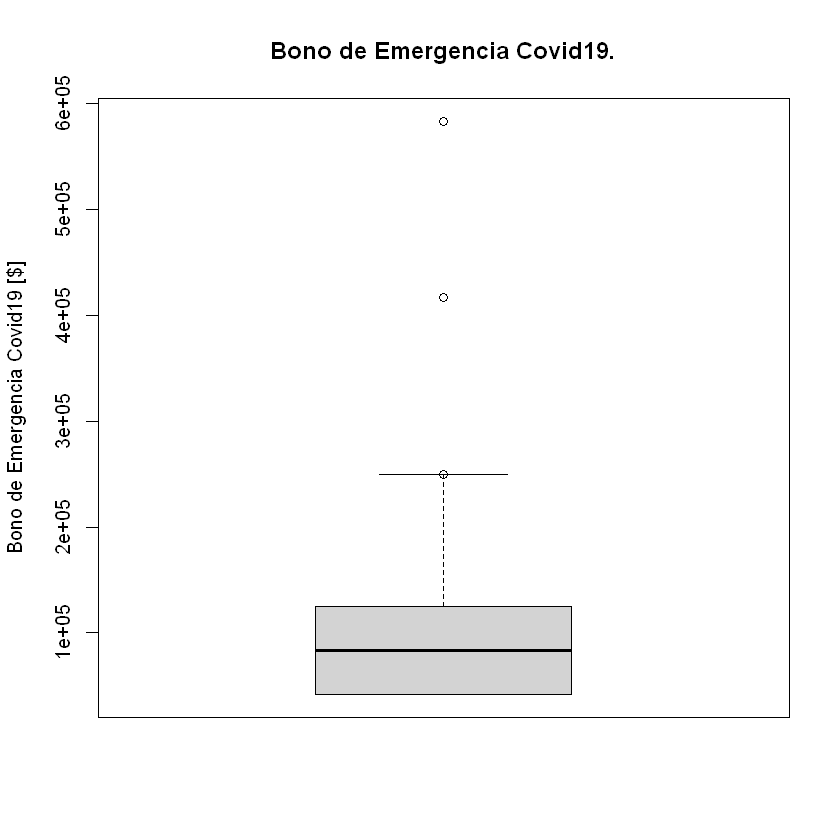

In [16]:
pdf("Box_IFE.pdf")
box_charge <- boxplot(casen$X4, main="Bono de Emergencia Covid19.",
                      ylab= "Bono de Emergencia Covid19 [$]")
dev.off()
box_charge <- boxplot(casen$X4, main="Bono de Emergencia Covid19.",
                      ylab= "Bono de Emergencia Covid19 [$]")

## X5 : Ingreso Total del Hogar

png 
  2

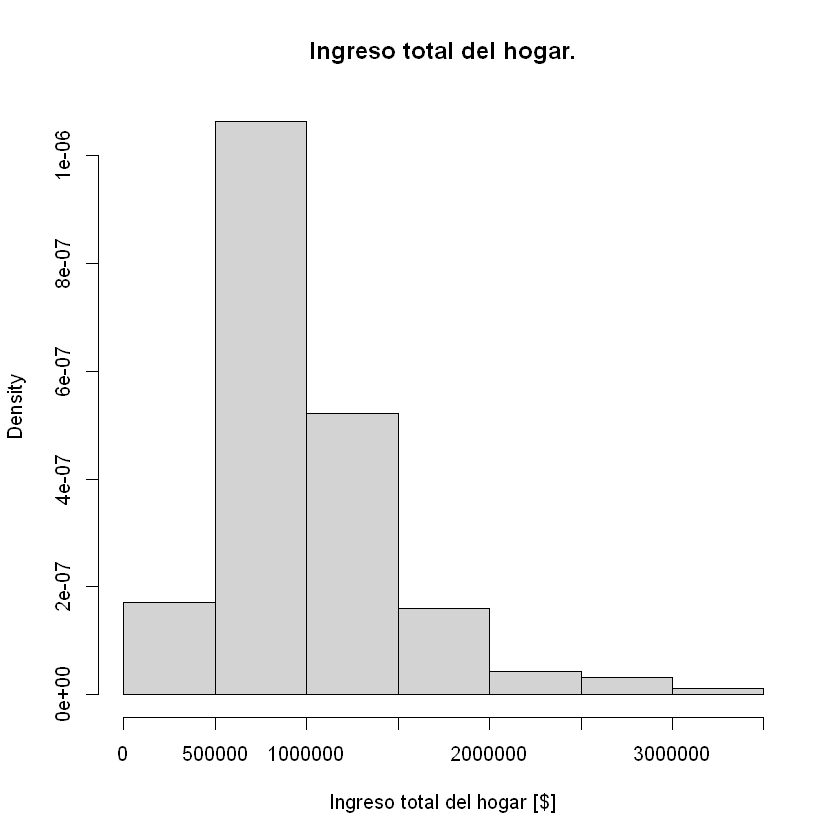

In [17]:
pdf("Histo_IngresoHogar.pdf")
hist_X1 <- hist(casen$X5, main="Ingreso total del hogar.",
        xlab="Ingreso total del hogar [$]",
        prob = TRUE)
dev.off()
hist_X1 <- hist(casen$X5, main="Ingreso total del hogar.",
        xlab="Ingreso total del hogar [$]",
        prob = TRUE)

png 
  2

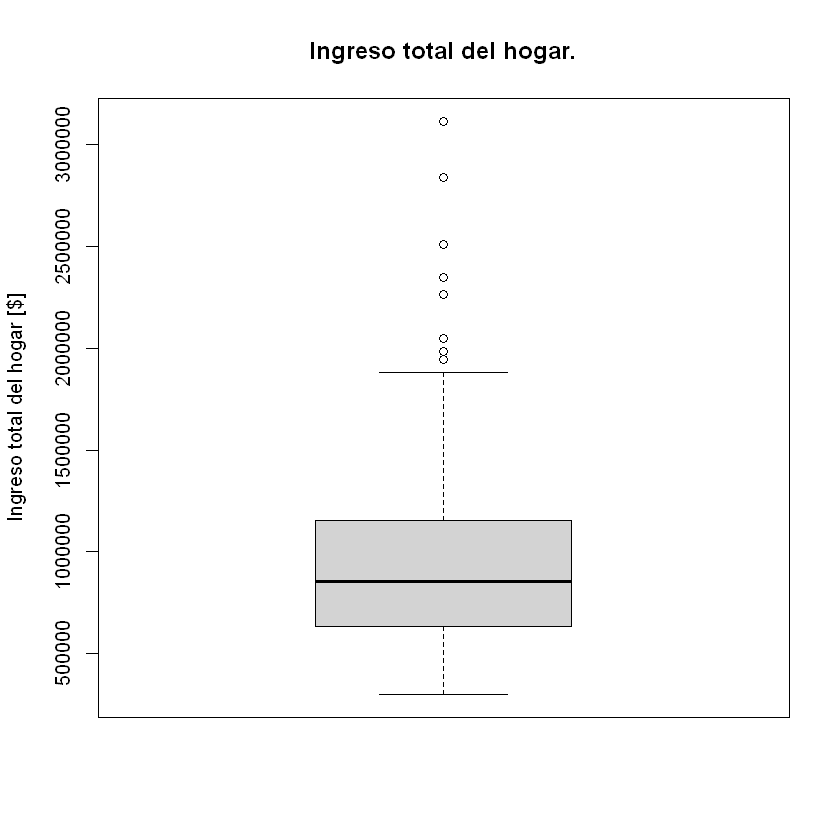

In [18]:
pdf("Box_IngresoHogar.pdf")
box_charge <- boxplot(casen$X5, main="Ingreso total del hogar.",
                      ylab= "Ingreso total del hogar [$]")
dev.off()
box_charge <- boxplot(casen$X5, main="Ingreso total del hogar.",
                      ylab= "Ingreso total del hogar [$]")

## X6 : Pensión Alimenticia

png 
  2

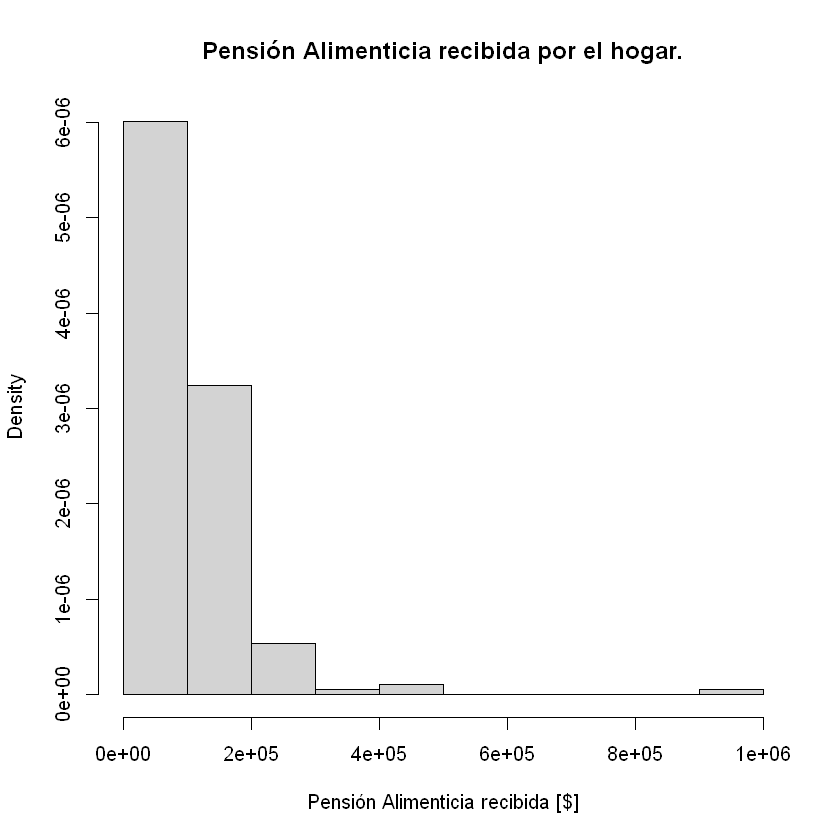

In [19]:
pdf("Histo_PensionAlimenticia.pdf")
hist_X1 <- hist(casen$X6, main="Pensión Alimenticia recibida por el hogar.",
        xlab="Pensión Alimenticia recibida [$]",
        prob = TRUE)
dev.off()
hist_X1 <- hist(casen$X6, main="Pensión Alimenticia recibida por el hogar.",
        xlab="Pensión Alimenticia recibida [$]",
        prob = TRUE)

png 
  2

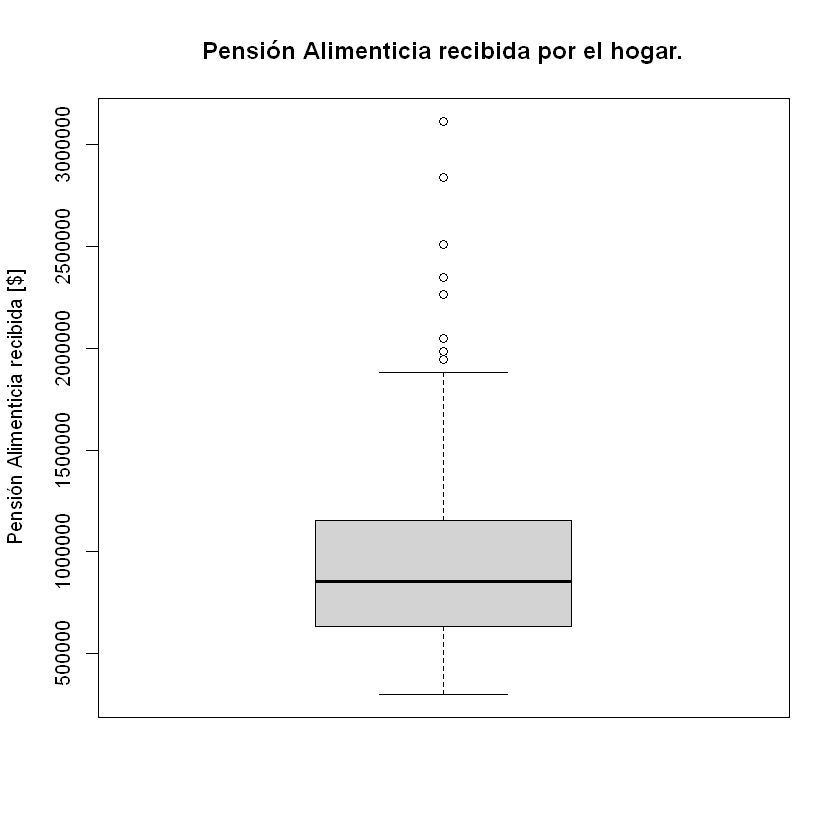

In [20]:
pdf("Box_PensionAlimenticia.pdf")
box_charge <- boxplot(casen$X5, main="Pensión Alimenticia recibida por el hogar.",
                      ylab= "Pensión Alimenticia recibida [$]")
dev.off()
box_charge <- boxplot(casen$X5, main="Pensión Alimenticia recibida por el hogar.",
                      ylab= "Pensión Alimenticia recibida [$]")

## VB : Situación Habitacional
0: Cedida, v1: Arrendada, v2: Propia

In [21]:
table(casen$V1)
table(casen$V2)
table(casen$V1 + casen$V2)


  0   1 
141  47 


  0   1 
 79 109 


  0   1 
 32 156 

### 47 arriendan, 109 son propietarios y 32 viven en domicilios cedidos

In [22]:
pdf("Histo_Vivienda.pdf")
barplot(c(32/188, 47/188,109/188),
        main = 'Situacion Habitacional en porcentaje',
        xlab='Propiedades, 0: Cedidas, 1: Arrendadas, 2: Propietario')
dev.off()

png 
  2

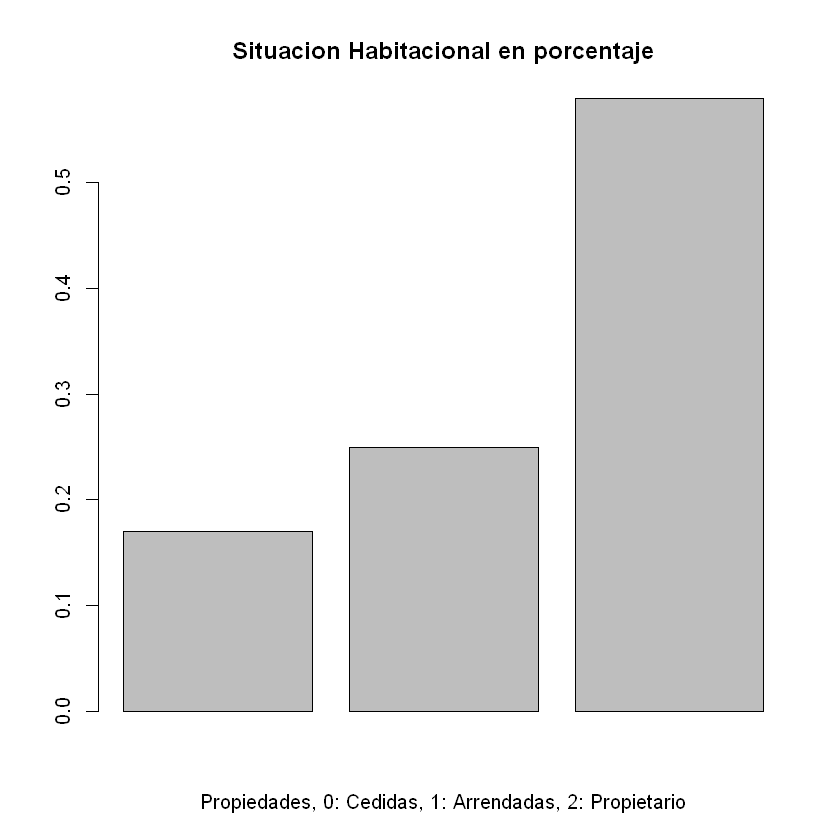

In [23]:
barplot(c(32/188, 47/188,109/188),
        main = 'Situacion Habitacional en porcentaje',
        xlab='Propiedades, 0: Cedidas, 1: Arrendadas, 2: Propietario')

## Zona : Zona donde vive. 
0: Rural, z1: Urbana

png 
  2

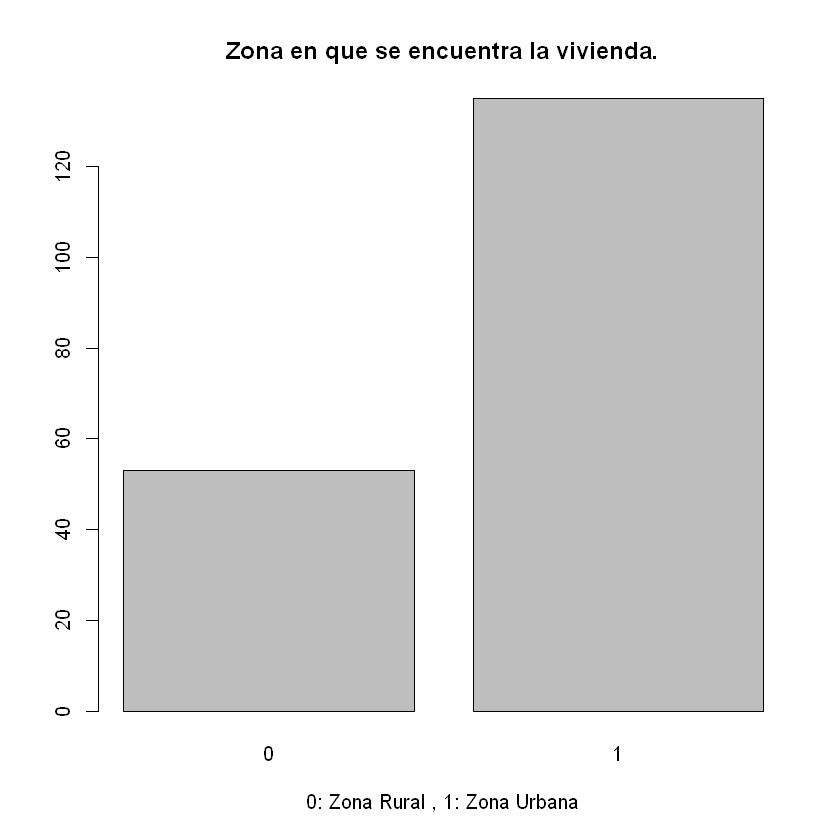

In [24]:
pdf("Histo_ZonaVivienda.pdf")
hist_Z1 <- barplot(table(casen$Z1), main="Zona en que se encuentra la vivienda.",
        xlab="0: Zona Rural , 1: Zona Urbana")
dev.off()
hist_Z1 <- barplot(table(casen$Z1), main="Zona en que se encuentra la vivienda.",
        xlab="0: Zona Rural , 1: Zona Urbana")

## Educ: Nivel educacional alcanzado
0: Enseñanza básica, E1: Enseñanza media, E2: Educación Superior

In [25]:
table(casen$E1)
table(casen$E2)
table(casen$E1 + casen$E2)


  0   1 
 56 132 


  0   1 
165  23 


  0   1 
 33 155 

### 33 alcanzan E. Basica, 132 E. Media y 23 Estudios superiores

In [26]:
pdf("Histo_NivelEduc.pdf")
barplot(c(33, 132,23),
        main = 'Nivel de Estudios',
        xlab='Nivel de estudios, 0: E. Básica, 1: E. Media, 2: Estudios Superiores')
dev.off()

png 
  2

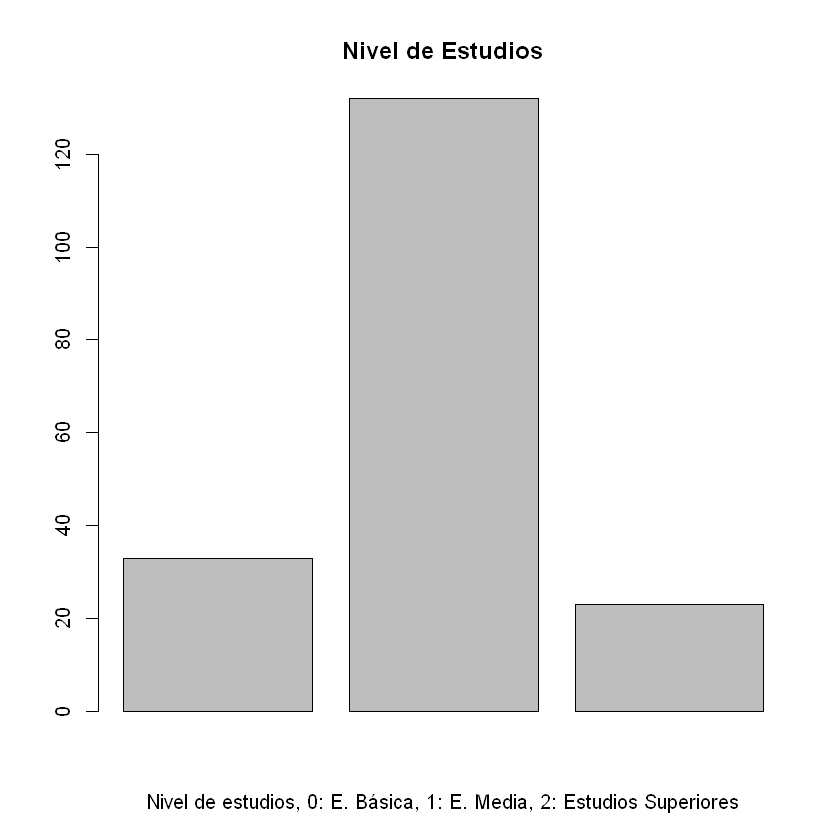

In [27]:
barplot(c(33, 132,23),
        main = 'Nivel de Estudios',
        xlab='Nivel de estudios, 0: E. Básica, 1: E. Media, 2: Estudios Superiores')

# VEAMOS GRAFICOS DE DISPERSION

In [49]:
regresion_X2   <- lm(casen$X1 ~ casen$X2 , data = casen)
regresion_X3   <- lm(casen$X1 ~ casen$X3 , data = casen)
regresion_X4  <- lm(casen$X1 ~ casen$X4  , data = casen)
regresion_X5   <- lm(casen$X1 ~ casen$X5  , data = casen)
regresion_X6   <- lm(casen$X1 ~ casen$X6  , data = casen) 

png 
  2

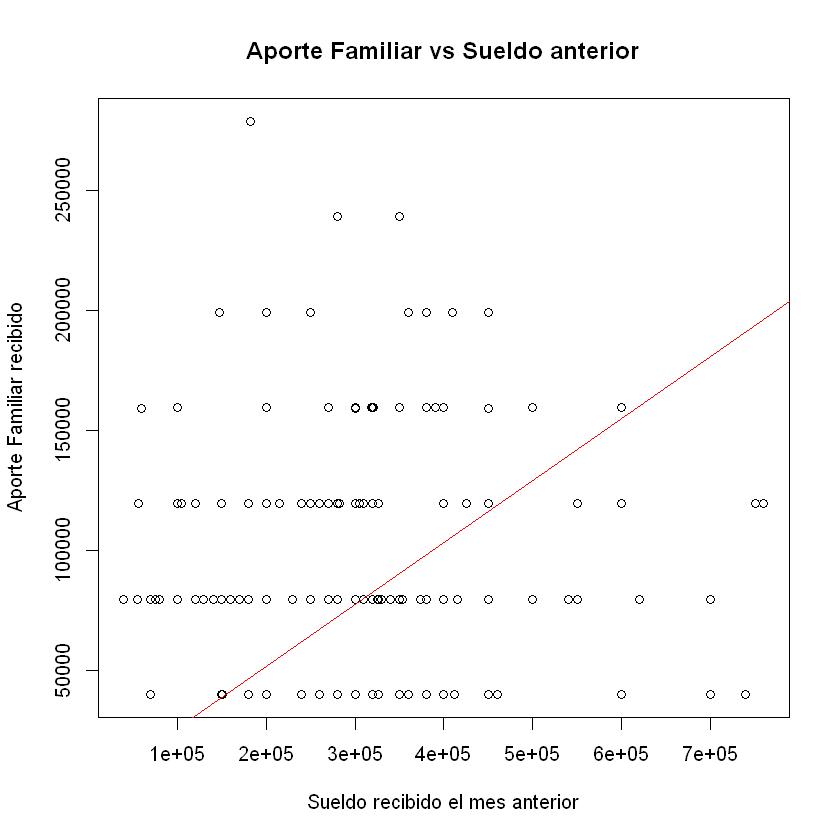

In [43]:
pdf("AporteFamiliar_vs_Sueldo.pdf")
plot(casen$X2 , casen$X1, xlab='Sueldo recibido el mes anterior', ylab='Aporte Familiar recibido', main='Aporte Familiar vs Sueldo anterior')
abline(regresion_X2, col="red")
dev.off()
plot(casen$X2 , casen$X1, xlab='Sueldo recibido el mes anterior', ylab='Aporte Familiar recibido', main='Aporte Familiar vs Sueldo anterior')
abline(regresion_X2, col="red")

In [44]:
summary(regresion_X2)


Call:
lm(formula = casen$X1 ~ casen$X2 - 1, data = casen)

Residuals:
    Min      1Q  Median      3Q     Max 
-151108  -11867   16077   56268  231613 

Coefficients:
         Estimate Std. Error t value Pr(>|t|)    
casen$X2  0.25833    0.01415   18.26   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 64910 on 187 degrees of freedom
Multiple R-squared:  0.6407,	Adjusted R-squared:  0.6388 
F-statistic: 333.5 on 1 and 187 DF,  p-value: < 2.2e-16


png 
  2

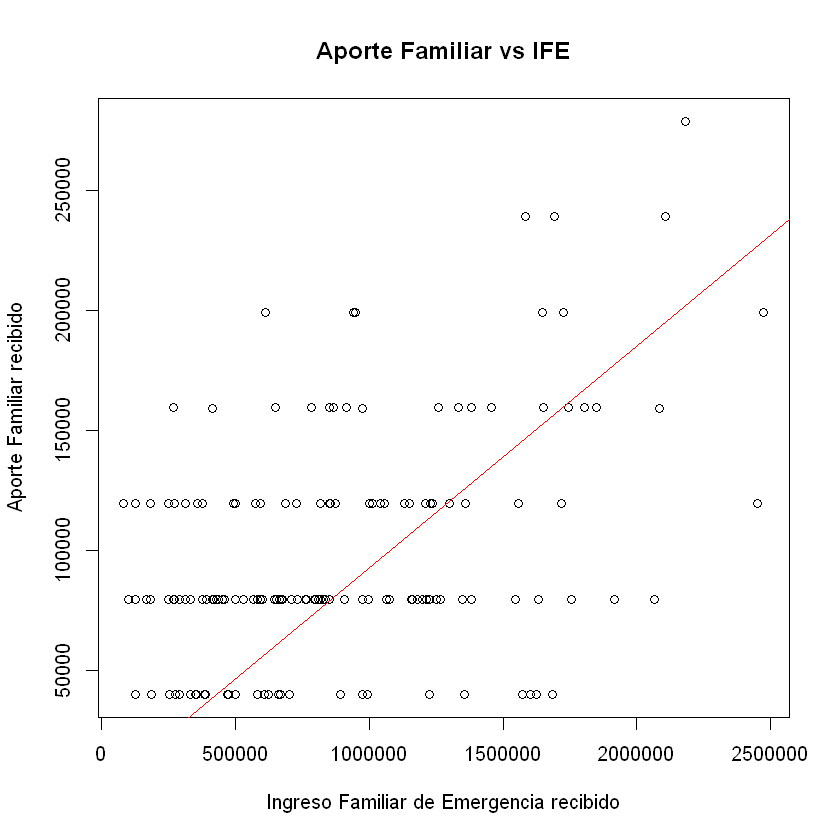

In [45]:
pdf("AporteFamiliar_vs_IFE.pdf")
plot(casen$X3 , casen$X1, xlab='Ingreso Familiar de Emergencia recibido', ylab='Aporte Familiar recibido', main='Aporte Familiar vs IFE')
abline(regresion_X3, col="red")
dev.off()
plot(casen$X3 , casen$X1, xlab='Ingreso Familiar de Emergencia recibido', ylab='Aporte Familiar recibido', main='Aporte Familiar vs IFE')
abline(regresion_X3, col="red")

In [46]:
summary(regresion_X3)


Call:
lm(formula = casen$X1 ~ casen$X3 - 1, data = casen)

Residuals:
    Min      1Q  Median      3Q     Max 
-115882  -10891   17822   52139  142373 

Coefficients:
         Estimate Std. Error t value Pr(>|t|)    
casen$X3 0.092484   0.003937   23.49   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 54480 on 187 degrees of freedom
Multiple R-squared:  0.7469,	Adjusted R-squared:  0.7455 
F-statistic: 551.8 on 1 and 187 DF,  p-value: < 2.2e-16


png 
  2

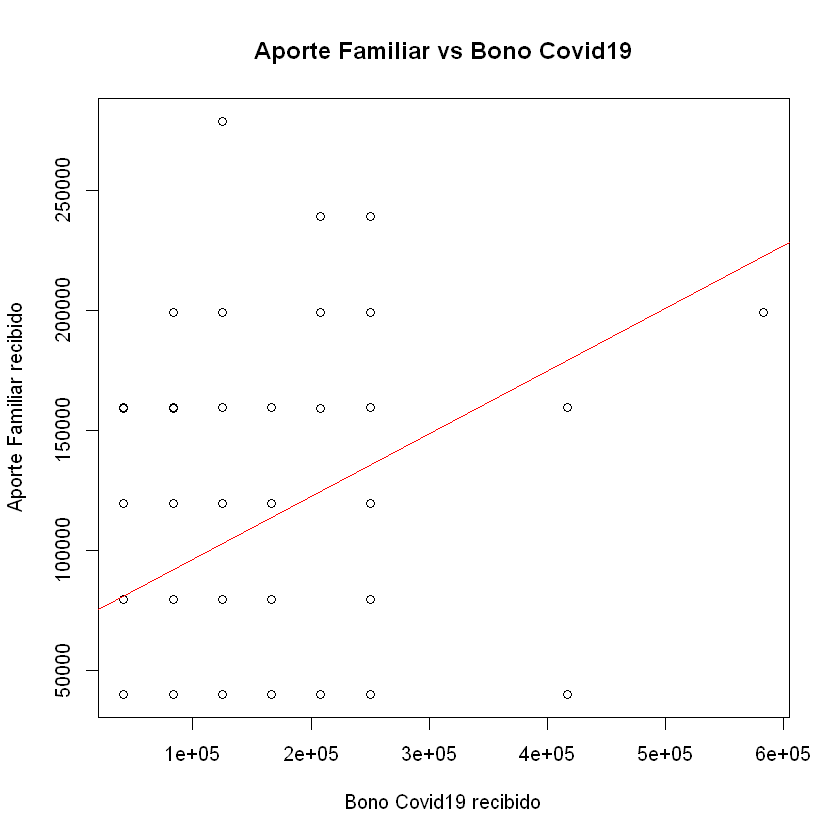

In [47]:
pdf("AporteFamiliar_vs_BonoCovid.pdf")
plot(casen$X4 , casen$X1, xlab='Bono Covid19 recibido', ylab='Aporte Familiar recibido', main='Aporte Familiar vs Bono Covid19')
abline(regresion_X4, col="red")
dev.off()
plot(casen$X4 , casen$X1, xlab='Bono Covid19 recibido', ylab='Aporte Familiar recibido', main='Aporte Familiar vs Bono Covid19')
abline(regresion_X4, col="red")

In [48]:
summary(regresion_X4)


Call:
lm(formula = casen$X1 ~ casen$X4, data = casen)

Residuals:
    Min      1Q  Median      3Q     Max 
-139104  -23125  -12243   16675  175892 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.009e+04  5.430e+03  12.908   <2e-16 ***
casen$X4    2.611e-01  4.227e-02   6.178    4e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 41920 on 186 degrees of freedom
Multiple R-squared:  0.1703,	Adjusted R-squared:  0.1658 
F-statistic: 38.17 on 1 and 186 DF,  p-value: 3.997e-09


png 
  2

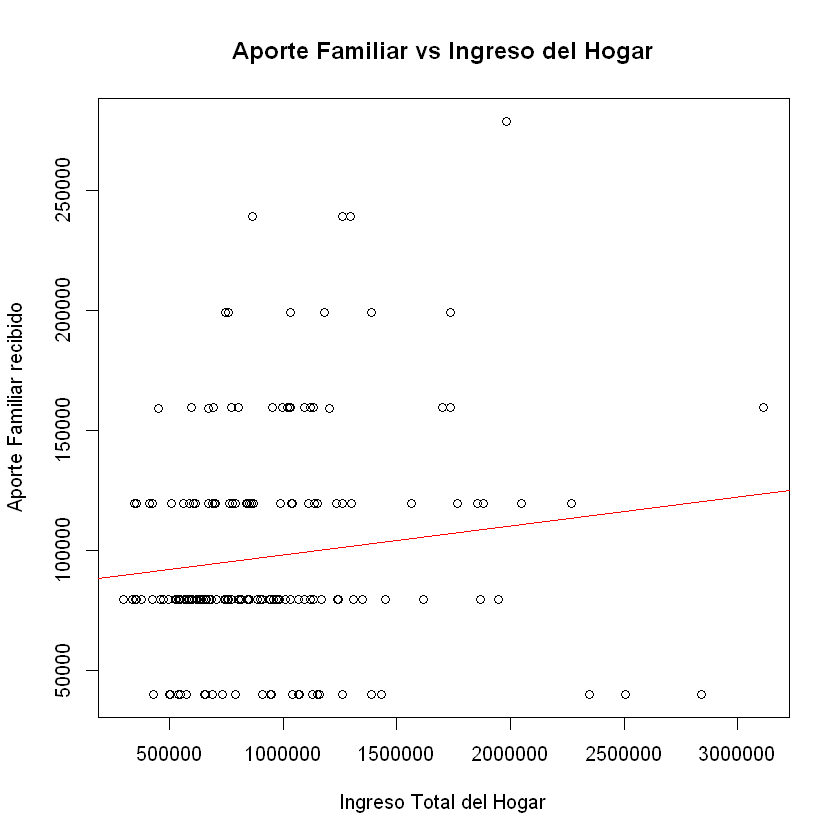

In [35]:
pdf("AporteFamiliar_vs_IngresoTotal.pdf")
plot(casen$X5 , casen$X1, xlab='Ingreso Total del Hogar', ylab='Aporte Familiar recibido', main='Aporte Familiar vs Ingreso del Hogar')
abline(regresion_X5, col="red")
dev.off()
plot(casen$X5 , casen$X1, xlab='Ingreso Total del Hogar', ylab='Aporte Familiar recibido', main='Aporte Familiar vs Ingreso del Hogar')
abline(regresion_X5, col="red")

In [36]:
summary(regresion_X5)


Call:
lm(formula = casen$X1 ~ casen$X5, data = casen)

Residuals:
   Min     1Q Median     3Q    Max 
-80378 -19642 -13259  23940 168744 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 8.599e+04  7.339e+03  11.716   <2e-16 ***
casen$X5    1.205e-02  6.663e-03   1.808   0.0723 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 45620 on 186 degrees of freedom
Multiple R-squared:  0.01726,	Adjusted R-squared:  0.01198 
F-statistic: 3.267 on 1 and 186 DF,  p-value: 0.07229


png 
  2

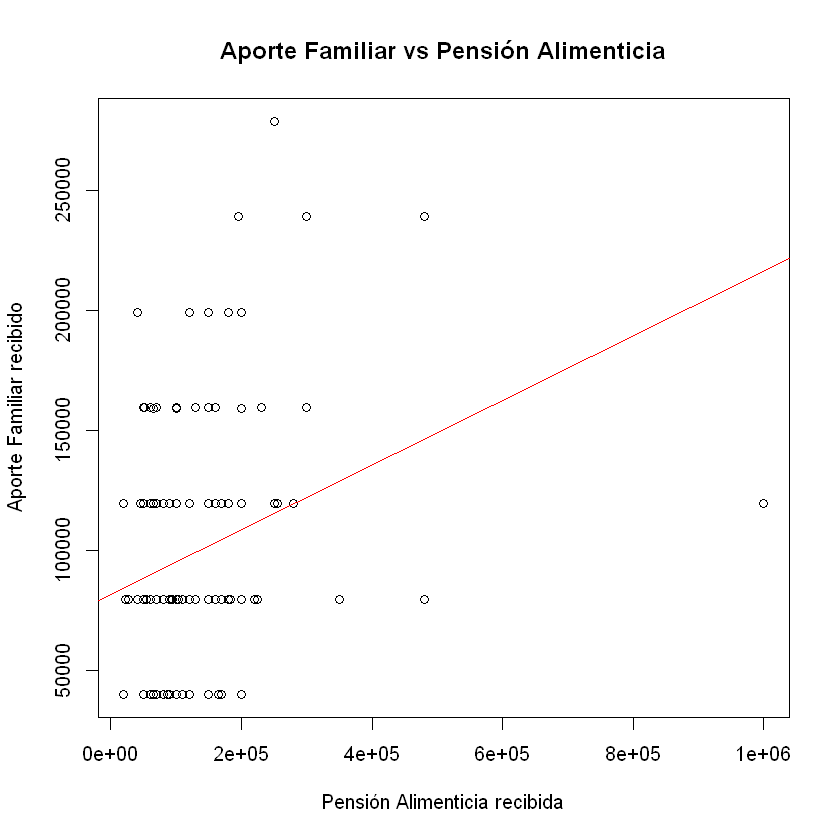

In [37]:
pdf("AporteFamiliar_vs_PensionAlimenticia.pdf")
plot(casen$X6 , casen$X1, xlab='Pensión Alimenticia recibida', ylab='Aporte Familiar recibido', main='Aporte Familiar vs Pensión Alimenticia')
abline(regresion_X6, col="red")
dev.off()
plot(casen$X6 , casen$X1, xlab='Pensión Alimenticia recibida', ylab='Aporte Familiar recibido', main='Aporte Familiar vs Pensión Alimenticia')
abline(regresion_X6, col="red")

In [38]:
summary(regresion_X6)


Call:
lm(formula = casen$X1 ~ casen$X6, data = casen)

Residuals:
   Min     1Q Median     3Q    Max 
-96671 -20147 -11416  24696 163408 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 8.160e+04  5.220e+03  15.632  < 2e-16 ***
casen$X6    1.345e-01  3.405e-02   3.949 0.000111 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 44210 on 186 degrees of freedom
Multiple R-squared:  0.07736,	Adjusted R-squared:  0.0724 
F-statistic: 15.59 on 1 and 186 DF,  p-value: 0.0001113
